<a href="https://colab.research.google.com/github/Priti-Kannaujiya/DeepLearning-FromScratch/blob/main/CatVSDog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("karakaggle/kaggle-cat-vs-dog-dataset")

Using Colab cache for faster access to the 'kaggle-cat-vs-dog-dataset' dataset.


In [ ]:
import os
os.listdir(path)

['kagglecatsanddogs_3367a']

In [ ]:
import os

# The previous error 'IsADirectoryError' occurred because we tried to read a directory as a CSV.
# Let's inspect the contents of the 'kagglecatsanddogs_3367a' directory.

dataset_sub_dir = os.path.join(path, "kagglecatsanddogs_3367a")

print(f"Contents of {dataset_sub_dir}:")
print(os.listdir(dataset_sub_dir))

# Based on the output, we can determine the correct file to load or how to proceed with the data.

Contents of /kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a:
['PetImages', 'readme[1].txt', 'MSR-LA - 3467.docx']


In [ ]:
import os

# Define the path to the 'PetImages' directory
pet_images_dir = os.path.join(dataset_sub_dir, "PetImages")

# Print the contents of this directory to understand its structure
print(f"Contents of {pet_images_dir}:")
print(os.listdir(pet_images_dir))

# Typically, image datasets are organized with subdirectories for each class (e.g., 'Cat', 'Dog').
# If this is the case, we would then iterate through these subdirectories to load the images.
# If all images are in one directory, we'll need to parse filenames to determine labels.

Contents of /kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages:
['Dog', 'Cat']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [ ]:
import tensorflow as tf
import pathlib

# Convert the pet_images_dir string to a pathlib Path object
data_dir = pathlib.Path(pet_images_dir)

# Define image parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Load the dataset using image_dataset_from_directory
# This function infers class labels from the directory structure
# We'll create a training and validation split.

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 24959 files belonging to 2 classes.
Using 19968 files for training.
Found 24959 files belonging to 2 classes.
Using 4991 files for validation.


##**Normalizing the Data**

In [ ]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
val_ds=val_ds.map(process)

##**Creating CNN Model**

In [ ]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='valid'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid') # Changed activation to 'sigmoid' for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
val_ds   = val_ds.apply(tf.data.experimental.ignore_errors())

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
    618/Unknown 71s 106ms/step - accuracy: 0.5767 - loss: 0.6637

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


618/618 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.5768 - loss: 0.6636 - val_accuracy: 0.7307 - val_loss: 0.5233
Epoch 2/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7660 - loss: 0.4838 - val_accuracy: 0.8042 - val_loss: 0.4169
Epoch 3/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8265 - loss: 0.3874 - val_accuracy: 0.8213 - val_loss: 0.3949
Epoch 4/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.8618 - loss: 0.3187 - val_accuracy: 0.8409 - val_loss: 0.3801
Epoch 5/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8966 - loss: 0.2430 - val_accuracy: 0.8383 - val_loss: 0.3984
Epoch 6/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9279 - loss: 0.1767 - val_accuracy: 0.8307 - val_loss: 0.4510
Epoch 7/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9563 - loss: 0.1156 - val_accuracy: 0.8225 - val_loss: 0.5991
Epoch 8/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9678 - loss: 0.0846 - val_accura

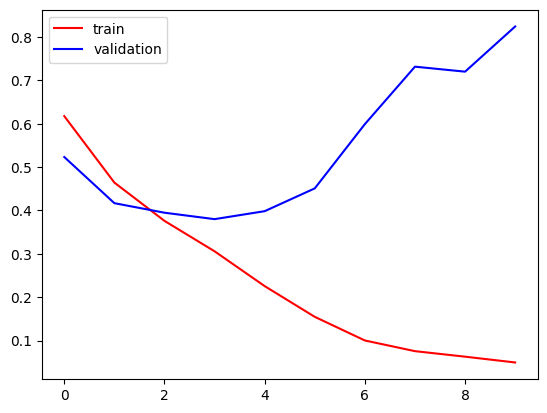

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#**Ways to Reduce Overfitting**
   **batch Normalization , Dropouts**


In [ ]:
model2=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(64,activation='relu'),
    Dropout(0.1),
    Dense(1,activation='sigmoid') # Changed activation to 'sigmoid' for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
    618/Unknown 31s 39ms/step - accuracy: 0.6020 - loss: 0.8694

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


618/618 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.6021 - loss: 0.8691 - val_accuracy: 0.7205 - val_loss: 0.5491
Epoch 2/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.7505 - loss: 0.5085 - val_accuracy: 0.7854 - val_loss: 0.4547
Epoch 3/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.8196 - loss: 0.4035 - val_accuracy: 0.6726 - val_loss: 0.7523
Epoch 4/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.8564 - loss: 0.3278 - val_accuracy: 0.8010 - val_loss: 0.4357
Epoch 5/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.8861 - loss: 0.2653 - val_accuracy: 0.8219 - val_loss: 0.4224
Epoch 6/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.9149 - loss: 0.1982 - val_accuracy: 0.8405 - val_loss: 0.4016
Epoch 7/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9447 - loss: 0.1391 - val_accuracy: 0.7858 - val_loss: 0.7244
Epoch 8/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.9593 - loss: 0.1039 - val_accurac

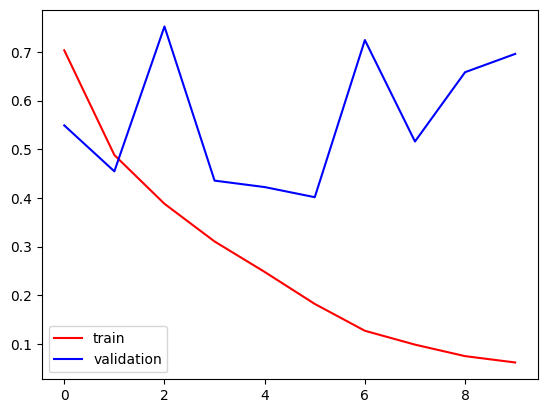

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/Dog Image.jpg')

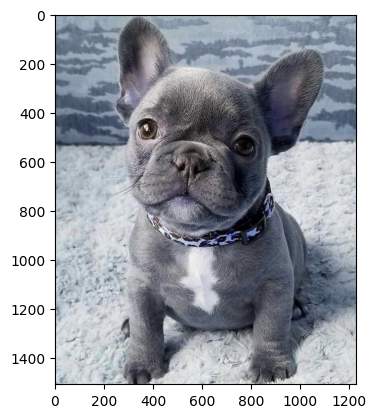

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(1509, 1230, 3)

In [ ]:
test_image=cv2.resize(test_image,(IMG_WIDTH, IMG_HEIGHT))

In [ ]:
test_image.shape

(256, 256, 3)

In [ ]:
test_input=test_image.reshape((1,IMG_HEIGHT,IMG_WIDTH,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)

In [ ]:
model2.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


array([[1.]], dtype=float32)